In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 100
T = 30

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp_iidG = [AMP(iidG.A, x, SNR), 
        D_AMP(iidG.A, x, SNR, P), 
        OAMP(iidG.A, x, SNR), 
        D_OAMP(iidG.A, x, SNR, P)]

final mse: 0.04133121099992242


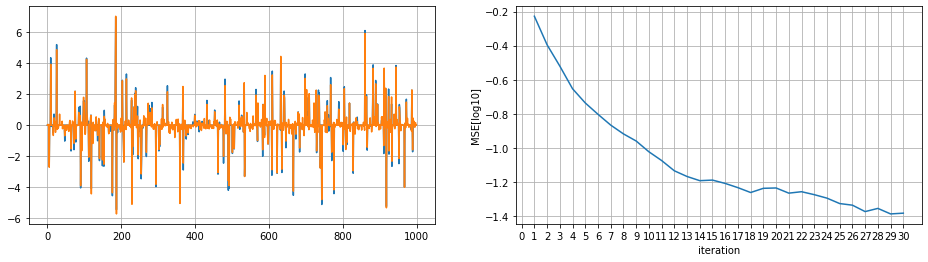

In [8]:
tmp_iidG[0].estimate(T=T)
tmp_iidG[0].result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[1].estimate(T=T, log=True)

N(P-1): 99000

1/30: tau = 2.0211207029692595, v = 1.0100558049984592
Rp: 39828.0 	 F: 464 	 F\Rp: 27758
Total Communication Cost: 67586
2/30: tau = 1.1605048453414635, v = 0.5797478761845611
Rp: 37561.0 	 F: 486 	 F\Rp: 30085
Total Communication Cost: 67646
3/30: tau = 0.8105648405776145, v = 0.40477787380263686
Rp: 39675.0 	 F: 483 	 F\Rp: 28747
Total Communication Cost: 68422
4/30: tau = 0.6143183429134061, v = 0.3066546249705327
Rp: 38513.0 	 F: 493 	 F\Rp: 29918
Total Communication Cost: 68431
5/30: tau = 0.48019974790613773, v = 0.2395953274668985
Rp: 41869.0 	 F: 515 	 F\Rp: 29597
Total Communication Cost: 71466
6/30: tau = 0.4146409446274237, v = 0.2068159258275415
Rp: 40003.0 	 F: 475 	 F\Rp: 28081
Total Communication Cost: 68084
7/30: tau = 0.399388419442496, v = 0.19918966323507764
Rp: 40406.0 	 F: 516 	 F\Rp: 30184
Total Communication Cost: 70590
8/30: tau = 0.3480282671992419, v = 0.1735095871134506
Rp: 37955.0 	 F: 486 	 F\Rp: 29663
Total Communication Cost: 67618
9/30: t

final mse: 0.1250723512754059


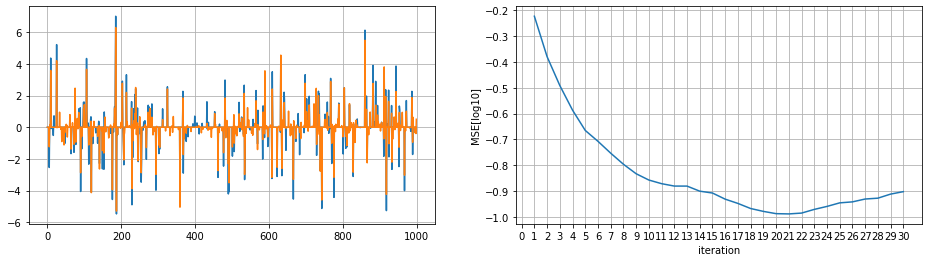

In [10]:
tmp_iidG[1].result()

final mse: 0.0052174671563416175


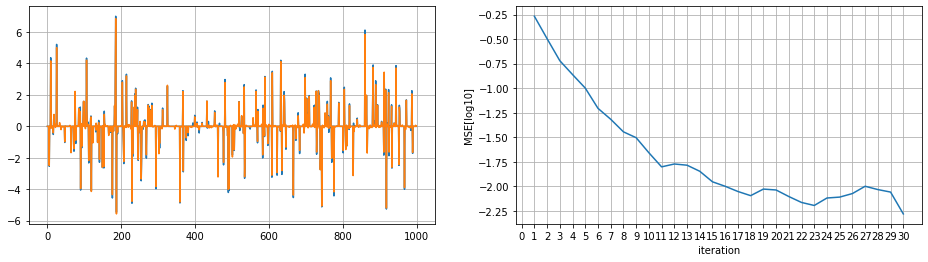

In [11]:
tmp_iidG[2].estimate(T=T)
tmp_iidG[2].result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[3].estimate(T=T, log=True)

N(P-1): 99000

1/30: tau = 1.0119738285046964, v = 1.0099495404182635
Rp: 66900.0 	 F: 453 	 F\Rp: 14941
Total Communication Cost: 81841
2/30: tau = 0.46140098407664637, v = 0.45937781866387695
Rp: 67066.0 	 F: 476 	 F\Rp: 15592
Total Communication Cost: 82658
3/30: tau = 0.30073409795926515, v = 0.2987138408565322
Rp: 66832.0 	 F: 477 	 F\Rp: 15682
Total Communication Cost: 82514
4/30: tau = 0.15953453673075235, v = 0.15751835974943154
Rp: 67120.0 	 F: 496 	 F\Rp: 16074
Total Communication Cost: 83194
5/30: tau = 0.12429912898514821, v = 0.12228866055305895
Rp: 66796.0 	 F: 493 	 F\Rp: 16235
Total Communication Cost: 83031
6/30: tau = 0.07624942778926315, v = 0.07424615648901435
Rp: 66698.0 	 F: 494 	 F\Rp: 16073
Total Communication Cost: 82771
7/30: tau = 0.056846735441931945, v = 0.054854222940790634
Rp: 66545.0 	 F: 492 	 F\Rp: 16083
Total Communication Cost: 82628
8/30: tau = 0.04032766488712764, v = 0.03834771932085808
Rp: 66418.0 	 F: 500 	 F\Rp: 16342
Total Communication Cost: 

final mse: 0.0033037224873097367


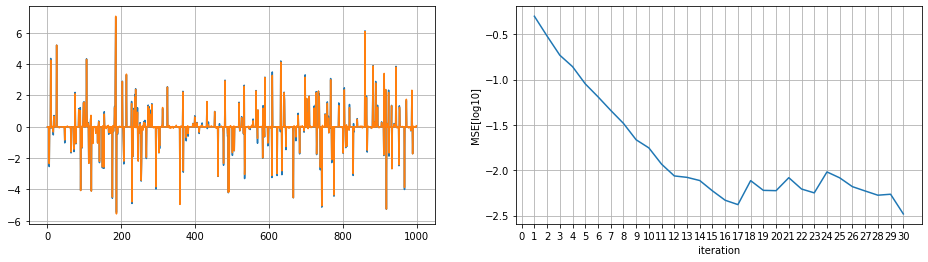

In [13]:
tmp_iidG[3].result()

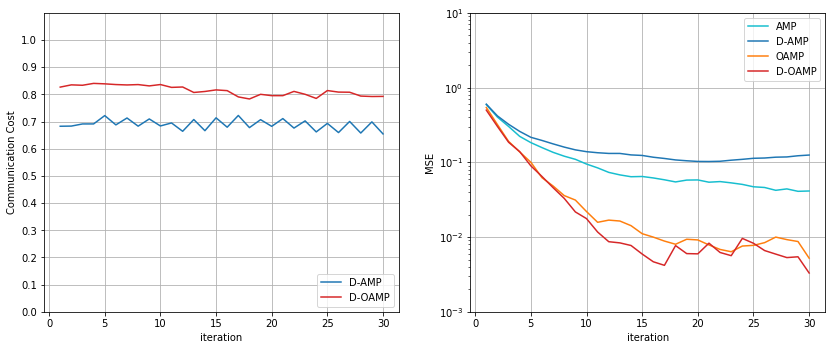

In [14]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_iidG[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_iidG[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_iidG[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_iidG[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_iidG[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_iidG[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [15]:
tmp_UniInv = [AMP(UniInv.A, x, SNR), 
              D_AMP(UniInv.A, x, SNR, P), 
              OAMP(UniInv.A, x, SNR), 
              D_OAMP(UniInv.A, x, SNR, P)]

final mse: 1.692392786485206e+58


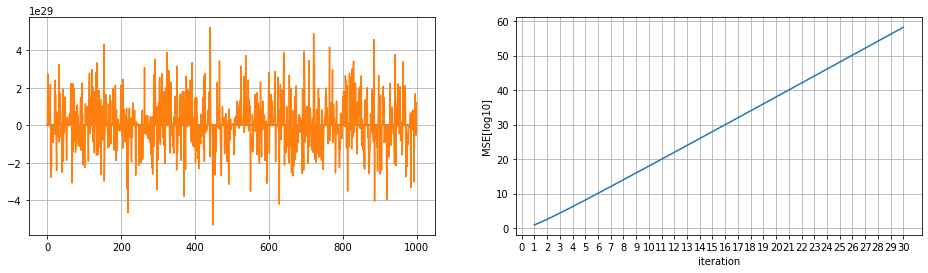

In [16]:
tmp_UniInv[0].estimate(T=T)
tmp_UniInv[0].result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[1].estimate(T=T, log=True)

N(P-1): 99000


1/30: tau = 1.9706230245161585, v = 0.9841232200491464
Rp: 72320.0 	 F: 766 	 F\Rp: 21177
Total Communication Cost: 93497
2/30: tau = 76.48872659052601, v = 38.24317500305406
Rp: 66398.0 	 F: 773 	 F\Rp: 25967
Total Communication Cost: 92365
3/30: tau = 3900.4759907474254, v = 1950.2368070815037
Rp: 67405.0 	 F: 788 	 F\Rp: 25666
Total Communication Cost: 93071
4/30: tau = 268332.10213615146, v = 134166.04987978353
Rp: 67739.0 	 F: 778 	 F\Rp: 25028
Total Communication Cost: 92767
5/30: tau = 20882211.334867332, v = 10441105.666245373
Rp: 68092.0 	 F: 766 	 F\Rp: 24306
Total Communication Cost: 92398
6/30: tau = 1772094327.7152512, v = 886047163.8564372
Rp: 68269.0 	 F: 761 	 F\Rp: 24130
Total Communication Cost: 92399
7/30: tau = 159849688558.7417, v = 79924844279.36967
Rp: 68545.0 	 F: 757 	 F\Rp: 23783
Total Communication Cost: 92328
8/30: tau = 14956391127480.39, v = 7478195563740.193
Rp: 68565.0 	 F: 761 	 F\Rp: 23978
Total Communication Cost: 92543
9/30: tau = 142

final mse: 2.047625746914278e+58


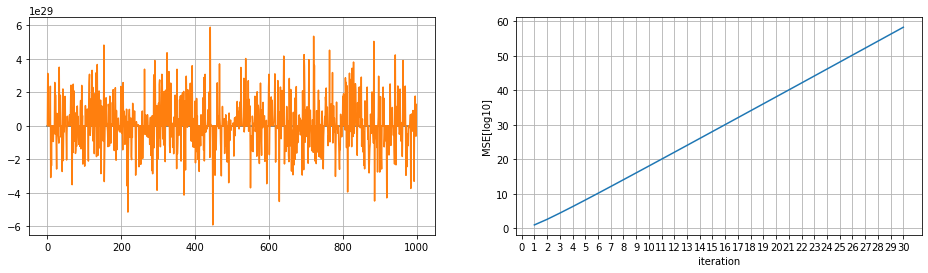

In [18]:
tmp_UniInv[1].result()

final mse: 0.01635687805142376


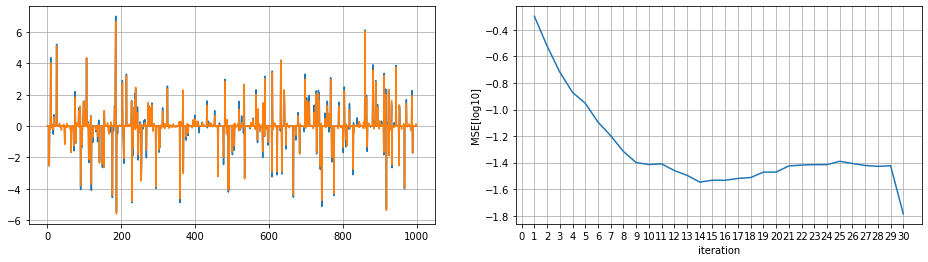

In [19]:
tmp_UniInv[2].estimate(T=T)
tmp_UniInv[2].result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[3].estimate(T=T, log=True)

N(P-1): 99000


1/30: tau = 0.9861230634234988, v = 0.9839357951455415
Rp: 68454.0 	 F: 449 	 F\Rp: 14194
Total Communication Cost: 82648
2/30: tau = 0.4793664832168204, v = 0.4771801435421281
Rp: 68304.0 	 F: 477 	 F\Rp: 14974
Total Communication Cost: 83278
3/30: tau = 0.29184919851418073, v = 0.2896652951396199
Rp: 68391.0 	 F: 462 	 F\Rp: 14606
Total Communication Cost: 82997
4/30: tau = 0.143312026140557, v = 0.14113216654744007
Rp: 68383.0 	 F: 513 	 F\Rp: 16007
Total Communication Cost: 84390
5/30: tau = 0.09957919845884006, v = 0.09740636190751789
Rp: 68162.0 	 F: 496 	 F\Rp: 15525
Total Communication Cost: 83687
6/30: tau = 0.08301391011623716, v = 0.08084572465458775
Rp: 68104.0 	 F: 477 	 F\Rp: 14901
Total Communication Cost: 83005
7/30: tau = 0.046803220737796886, v = 0.04464501172305286
Rp: 68030.0 	 F: 547 	 F\Rp: 17166
Total Communication Cost: 85196
8/30: tau = 0.04422262718151891, v = 0.042073791233211796
Rp: 68192.0 	 F: 531 	 F\Rp: 16545
Total Communication Cost: 847

final mse: 0.003933498954852496


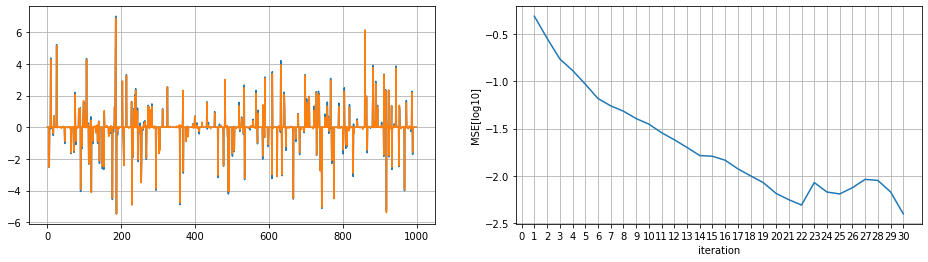

In [21]:
tmp_UniInv[3].result()

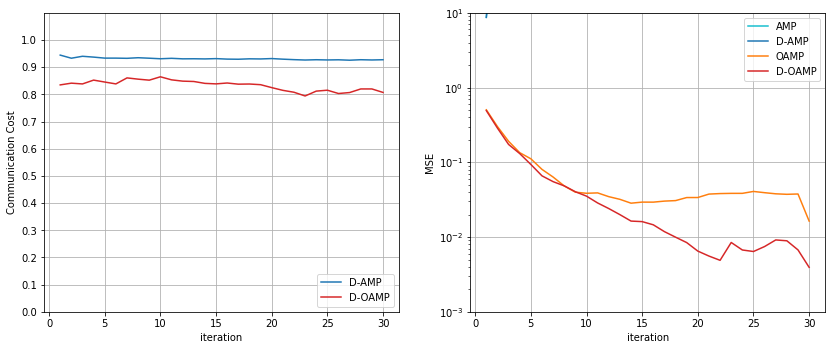

In [22]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_UniInv[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_UniInv[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_UniInv[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_UniInv[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_UniInv[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_UniInv[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()